<a href="https://colab.research.google.com/github/Captmoonshot/DS-Sprint-02-Storytelling-With-Data/blob/master/LS_DS_122_Choose_appropriate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

# Upgrade Seaborn

Make sure you have at least version 0.9.0

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2018-11-13 17:12:41--  https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1641 (1.6K) [text/plain]
Saving to: ‘misleading.py’

misleading.py       100%[===================>]   1.60K  --.-KB/s    in 0s      

2018-11-13 17:12:41 (137 MB/s) - ‘misleading.py’ saved [1641/1641]



#### Fix misleading plot #1

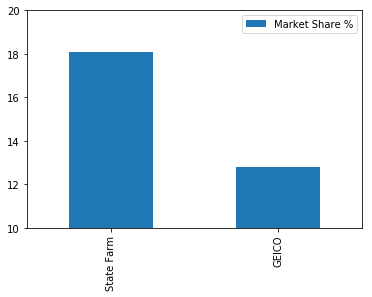

In [4]:
misleading.plot1()

In [0]:
misleading??


In [0]:
insurance = pd.DataFrame(index=['State Farm', 'GEICO'], data={'Market Share %': [18.07, 12.79]})


def plot1():
    return insurance.plot.bar(ylim=(0, 20))


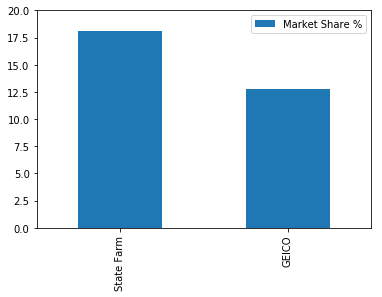

In [28]:
# y-axis doesn't start at zero
plot1()

#### Fix misleading plot #2

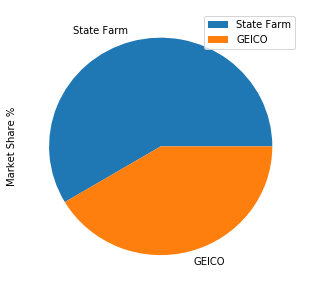

In [29]:
misleading.plot2()

In [0]:
misleading.plot2??

In [0]:
def plot2():
    return insurance.plot.pie('Market Share %', figsize=(5, 5))


In [42]:
# Doesn't add up to 100%
other = pd.DataFrame(index=['Other'], data={'Market Share %': [100-18.07-12.79]})

other 

,Market Share %
Other,69.14


#### Fix misleading plot #3

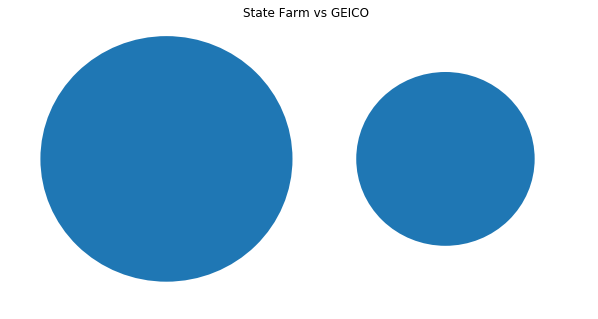

In [43]:
misleading.plot3()

In [0]:
misleading.plot3??

In [0]:
import math
def plot3():
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlim((0, 80))
    ax.set_ylim((0, 40))
    plt.axis('off')

    circle = plt.Circle(xy=(20, 20), radius=math.sqrt(18.07))
    ax.add_artist(circle)

    circle = plt.Circle(xy=(60, 20), radius=math.sqrt(12.79))
    ax.add_artist(circle)

    plt.title('State Farm vs GEICO')
    plt.show()

In [52]:
18.07 / 12.79

1.4128225175918687

In [53]:
18.07**2 / 12.79**2

1.9960674662146263

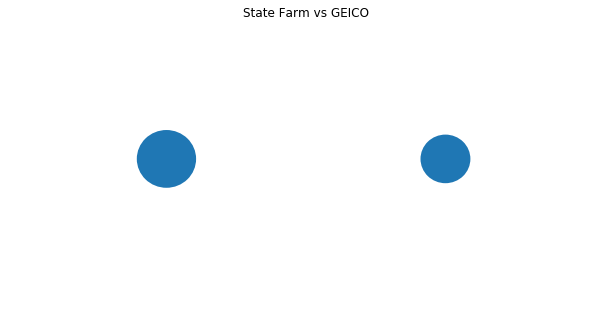

In [54]:
# Size of plots look misleading
plot3()

#### Fix misleading plot #4

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
# import altair as alt
# alt.renderers.enable('notebook')

In [68]:
misleading.plot4()

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

In [0]:
misleading.plot4??

In [0]:
def plot4():
    # Based on https://altair-viz.github.io/gallery/choropleth_repeat.html
    import altair as alt
    from vega_datasets import data

    url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
    df = pd.read_csv(url)
    df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
    variable = 'State Farm policy premiums'

    states = alt.topo_feature(data.us_10m.url, 'states')

    return alt.Chart(states).mark_geoshape().encode(
        alt.Color(variable, type='quantitative')
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(df, 'id', [variable])
    ).properties(
        width=500,
        height=300
    ).project(
        type='albersUsa'
    )

In [71]:
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)
df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
variable = 'State Farm policy premiums'
    
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL
0,Alabama,1,768213,282947,3025561
1,Alaska,2,128613,81366,454623
2,Arizona,4,760003,604049,4373055
3,Arkansas,5,454931,96908,1777917
4,California,6,3655463,2091720,25255501


In [72]:
df['State Farm market share %'] = (df['State Farm policy premiums'] / df['STATE TOTAL'])
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL,State Farm market share %
0,Alabama,1,768213,282947,3025561,0.253908
1,Alaska,2,128613,81366,454623,0.282900
2,Arizona,4,760003,604049,4373055,0.173792
3,Arkansas,5,454931,96908,1777917,0.255879
4,California,6,3655463,2091720,25255501,0.144739


In [73]:
variable = 'State Farm market share'

states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

NameError: ignored

#### Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Where to Start and End Your Y-Axis Scale](http://stephanieevergreen.com/y-axis/)
- [xkcd heatmap](https://xkcd.com/1138/)
- [Surprise Maps: Showing the Unexpected](https://medium.com/@uwdata/surprise-maps-showing-the-unexpected-e92b67398865)

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

#### Links
- [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [Seaborn example gallery](https://seaborn.pydata.org/examples/index.html)
- [Chart Chooser](https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [84]:
df.shape

(44, 3)

### See the data

In [85]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [86]:
df.head(20)

# Really 4 datasets

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
groups = df.groupby('dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [88]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [93]:
groups.count()


,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [94]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [96]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [97]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

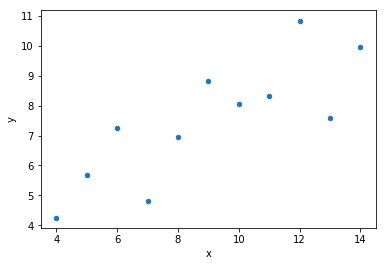

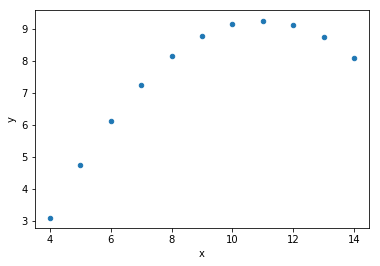

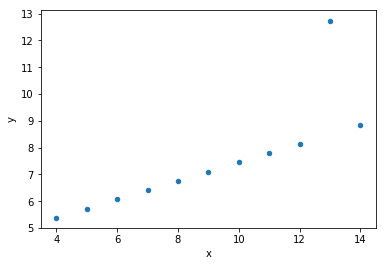

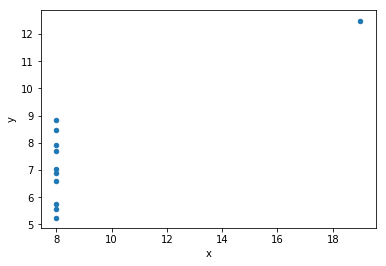

In [102]:
groups.plot(x="x", y="y", kind="scatter");


### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

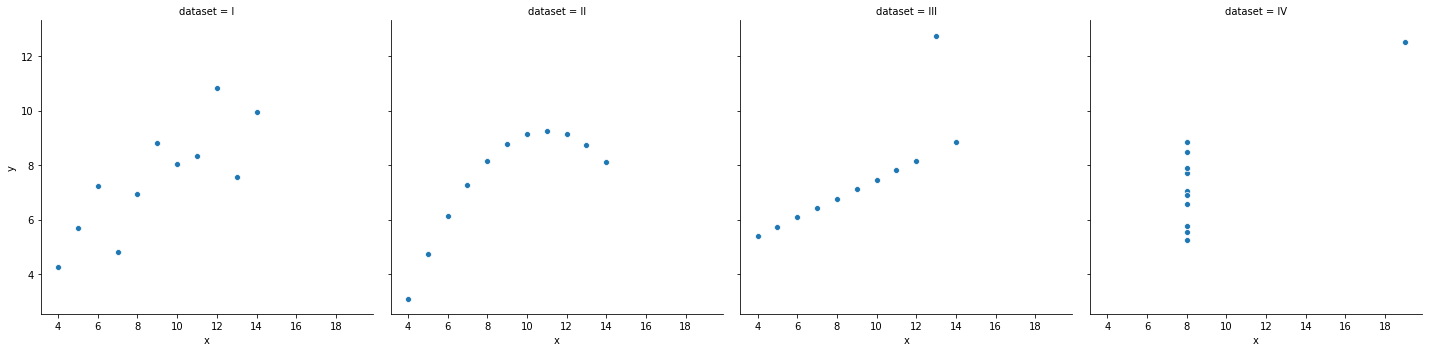

In [105]:
import seaborn as sns

sns.relplot(x="x", y="y", col='dataset', data=df);

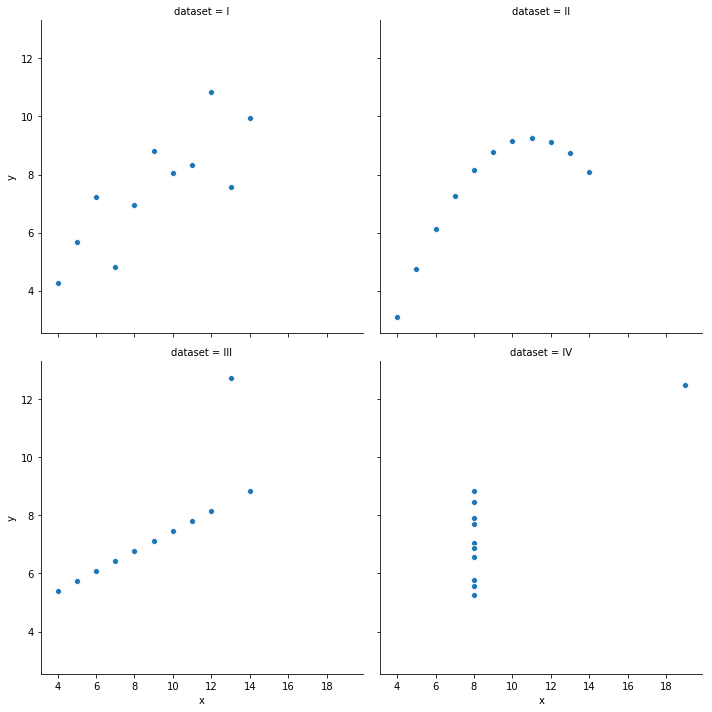

In [106]:
sns.relplot(x="x", y="y", col='dataset', col_wrap=2, data=df);

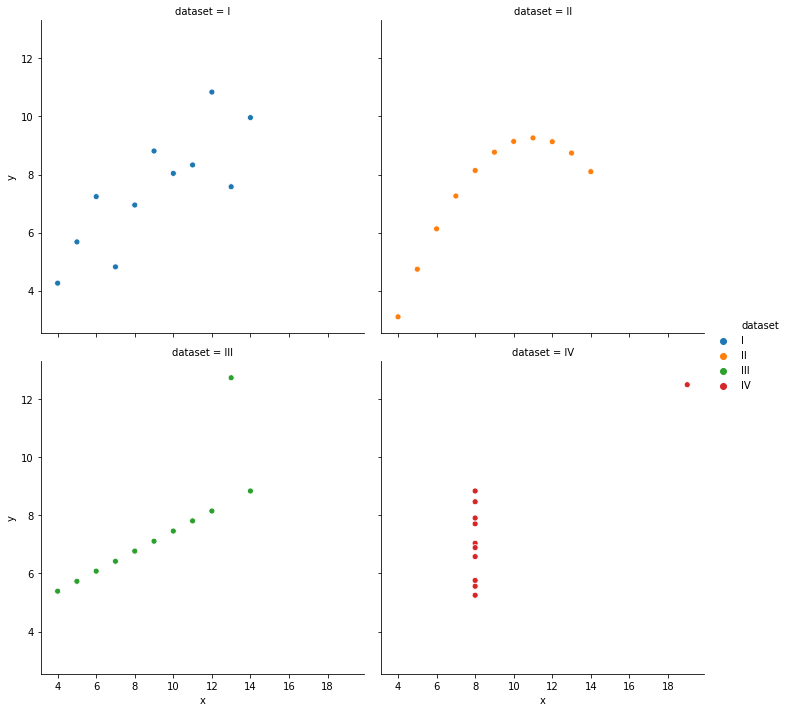

In [107]:
sns.relplot(x="x", y="y", col='dataset', hue='dataset', col_wrap=2, data=df);

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

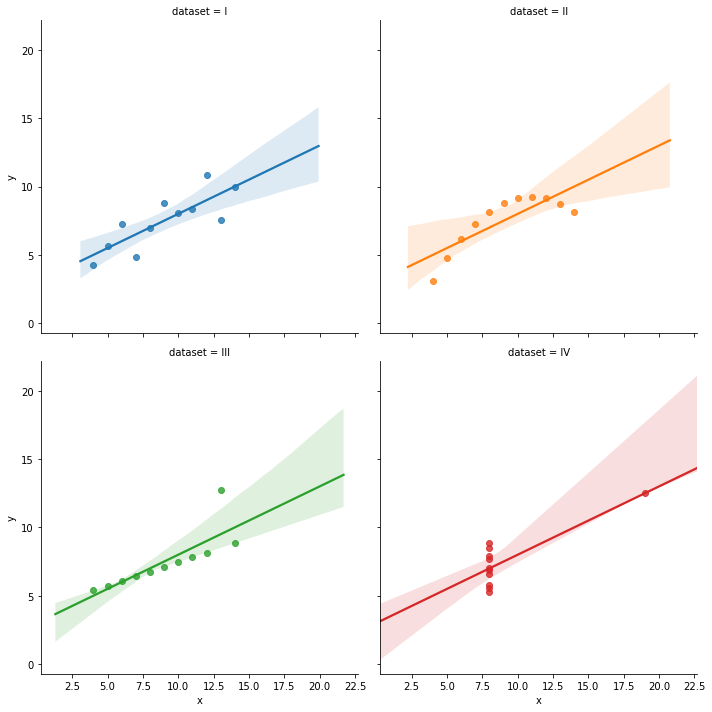

In [109]:
# Linear Model plot just change the 'rel' to 'lm'

sns.lmplot(x="x", y="y", col='dataset', hue='dataset', col_wrap=2, data=df);

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [3]:
tips.shape

(244, 7)

### See the first 5 rows

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# To see a random sample

tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
165,24.52,3.48,Male,No,Sun,Dinner,3
105,15.36,1.64,Male,Yes,Sat,Dinner,2
127,14.52,2.00,Female,No,Thur,Lunch,2
172,7.25,5.15,Male,Yes,Sun,Dinner,2
129,22.82,2.18,Male,No,Thur,Lunch,3


### Describe the data

In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
# To include categoricals in tips in the describe() function

tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [10]:
tips.describe(exclude=[np.number])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

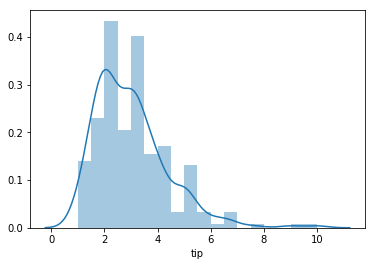

In [121]:
sns.distplot(tips.tip);

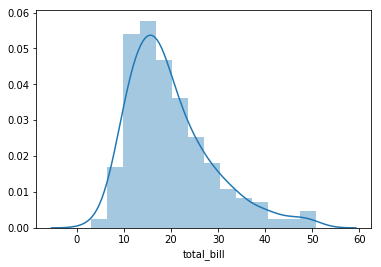

In [123]:
# Distribution plot of the 'total_bill' column
sns.distplot(tips.total_bill)

In [0]:
tips['percent'] = tips.tip/tips.total_bill

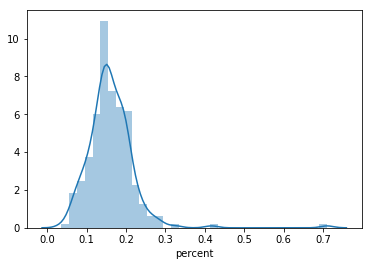

In [16]:
sns.distplot(tips['percent'])

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

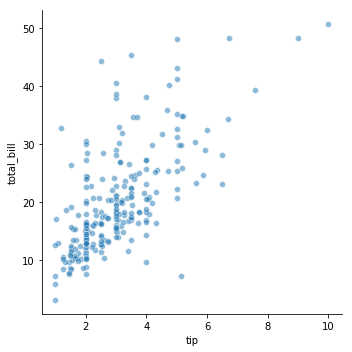

In [17]:
sns.relplot('tip', 'total_bill', data=tips, alpha=0.5);    # alpha controls transparency so we can make out overlapping points

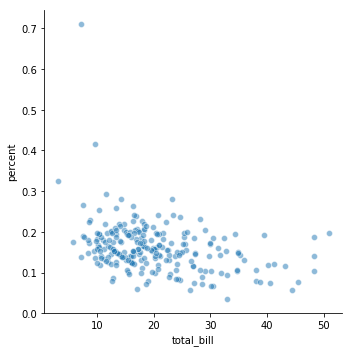

In [18]:
sns.relplot('total_bill', 'percent', data=tips, alpha=0.5);

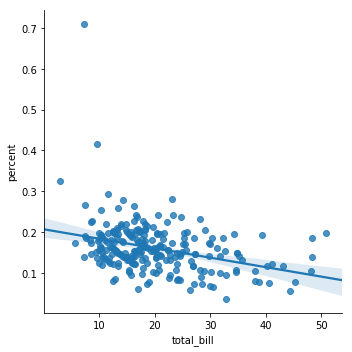

In [21]:
sns.lmplot('total_bill', 'percent', data=tips);

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [131]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

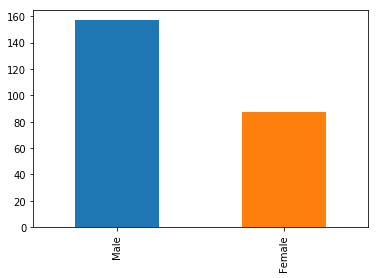

In [133]:
tips.sex.value_counts().plot.bar();

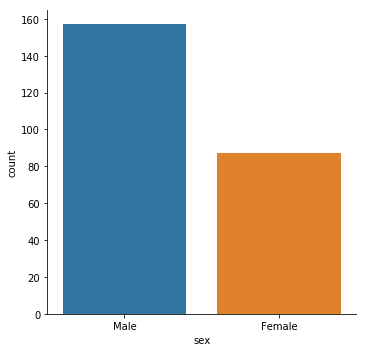

In [134]:
sns.catplot('sex', data=tips, kind='count');

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

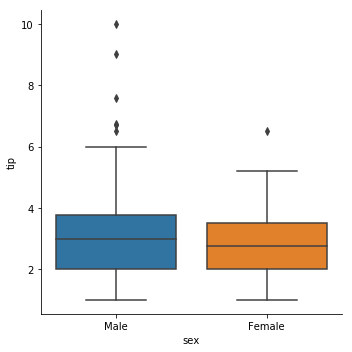

In [135]:
sns.catplot('sex', 'tip', data=tips, kind='box');

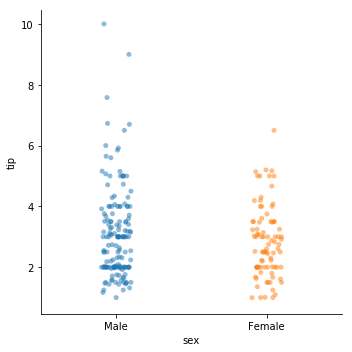

In [136]:
# Categorical scatterplot

sns.catplot('sex', 'tip', data=tips, kind='strip', alpha=0.5);

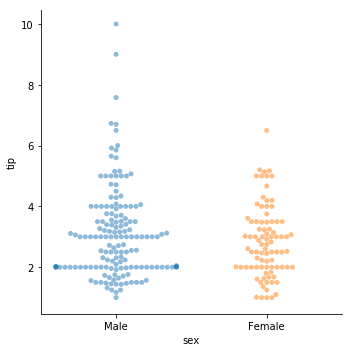

In [137]:
sns.catplot('sex', 'tip', data=tips, kind='swarm', alpha=0.5);

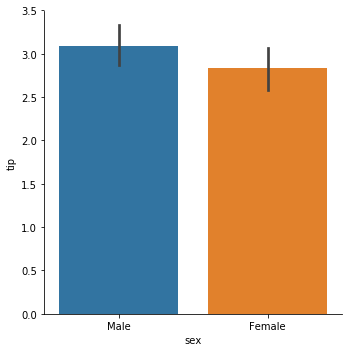

In [138]:
sns.catplot('sex', 'tip', data=tips, kind='bar');

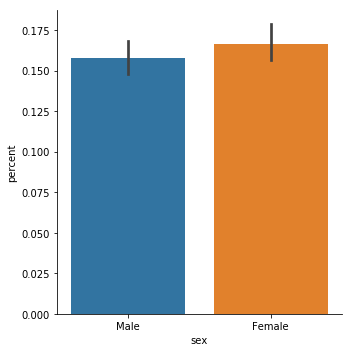

In [139]:
sns.catplot('sex', 'percent', data=tips, kind='bar');

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [216]:
flights.shape

(144, 3)

### See the first 5 rows

In [217]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [218]:
flights.head(25)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [219]:
flights.year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

In [221]:
flights.pivot("year", "month", "passengers")    # Month over month Numbers

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [222]:
flights.pivot("month", "year", "passengers")    # Year over Year Numbers

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### Describe the data

In [202]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [203]:
flight_groups_year = flights.groupby('year')
flight_groups_year.describe()

passengers                                                            
          count        mean        std    min     25%    50%     75%    max
year                                                                       
1949       12.0  126.666667  13.720147  104.0  118.00  125.0  135.25  148.0
1950       12.0  139.666667  19.070841  114.0  125.75  137.5  151.25  170.0
1951       12.0  170.166667  18.438267  145.0  159.00  169.0  179.50  199.0
1952       12.0  197.000000  22.966379  171.0  180.75  192.0  211.25  242.0
1953       12.0  225.000000  28.466887  180.0  199.75  232.0  238.50  272.0
1954       12.0  238.916667  34.924486  188.0  221.25  231.5  260.25  302.0
1955       12.0  284.000000  42.140458  233.0  260.75  272.0  312.75  364.0
1956       12.0  328.250000  47.861780  271.0  300.50  315.0  359.75  413.0
1957       12.0  368.416667  57.890898  301.0  330.75  351.5  408.50  467.0
1958       12.0  381.000000  64.530472  310.0  339.25  360.5  411.75  505.0
1959       12.0  428.333333  69.830097  342.0  387.50  406.5  465.25  559.0
1960       12.0  476.166667  77.737125  390.0  418.50  461.0  514.75  622.0

In [204]:
flight_groups_year.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
12,1950,January,115
13,1950,February,126
14,1950,March,141
15,1950,April,135
16,1950,May,125


In [205]:
flight_groups_year_month = flights.groupby(['year', 'month'])
flight_groups_year_month.describe()

passengers                                              
                    count   mean std    min    25%    50%    75%    max
year month                                                             
1949 January          1.0  112.0 NaN  112.0  112.0  112.0  112.0  112.0
     February         1.0  118.0 NaN  118.0  118.0  118.0  118.0  118.0
     March            1.0  132.0 NaN  132.0  132.0  132.0  132.0  132.0
     April            1.0  129.0 NaN  129.0  129.0  129.0  129.0  129.0
     May              1.0  121.0 NaN  121.0  121.0  121.0  121.0  121.0
     June             1.0  135.0 NaN  135.0  135.0  135.0  135.0  135.0
     July             1.0  148.0 NaN  148.0  148.0  148.0  148.0  148.0
     August           1.0  148.0 NaN  148.0  148.0  148.0  148.0  148.0
     September        1.0  136.0 NaN  136.0  136.0  136.0  136.0  136.0
     October          1.0  119.0 NaN  119.0  119.0  119.0  119.0  119.0
     November         1.0  104.0 NaN  104.0  104.0  104.0  104.0  104.0
     December         1.0  118.0 NaN  118.0  118.0  118.0  118.0  118.0
1950 January          1.0  115.0 NaN  115.0  115.0  115.0  115.0  115.0
     February         1.0  126.0 NaN  126.0  126.0  126.0  126.0  126.0
     March            1.0  141.0 NaN  141.0  141.0  141.0  141.0  141.0
     April            1.0  135.0 NaN  135.0  135.0  135.0  135.0  135.0
     May              1.0  125.0 NaN  125.0  125.0  125.0  125.0  125.0
     June             1.0  149.0 NaN  149.0  149.0  149.0  149.0  149.0
     July             1.0  170.0 NaN  170.0  170.0  170.0  170.0  170.0
     August           1.0  170.0 NaN  170.0  170.0  170.0  170.0  170.0
     September        1.0  158.0 NaN  158.0  158.0  158.0  158.0  158.0
     October          1.0  133.0 NaN  133.0  133.0  133.0  133.0  133.0
     November         1.0  114.0 NaN  114.0  114.0  114.0  114.0  114.0
     December         1.0  140.0 NaN  140.0  140.0  140.0  140.0  140.0
1951 January          1.0  145.0 NaN  145.0  145.0  145.0  145.0  145.0
     February         1.0  150.0 NaN  150.0  150.0  150.0  150.0  150.0
     March            1.0  178.0 NaN  178.0  178.0  178.0  178.0  178.0
     April            1.0  163.0 NaN  163.0  163.0  163.0  163.0  163.0
     May              1.0  172.0 NaN  172.0  172.0  172.0  172.0  172.0
     June             1.0  178.0 NaN  178.0  178.0  178.0  178.0  178.0
...                   ...    ...  ..    ...    ...    ...    ...    ...
1958 July             1.0  491.0 NaN  491.0  491.0  491.0  491.0  491.0
     August           1.0  505.0 NaN  505.0  505.0  505.0  505.0  505.0
     September        1.0  404.0 NaN  404.0  404.0  404.0  404.0  404.0
     October          1.0  359.0 NaN  359.0  359.0  359.0  359.0  359.0
     November         1.0  310.0 NaN  310.0  310.0  310.0  310.0  310.0
     December         1.0  337.0 NaN  337.0  337.0  337.0  337.0  337.0
1959 January          1.0  360.0 NaN  360.0  360.0  360.0  360.0  360.0
     February         1.0  342.0 NaN  342.0  342.0  342.0  342.0  342.0
     March            1.0  406.0 NaN  406.0  406.0  406.0  406.0  406.0
     April            1.0  396.0 NaN  396.0  396.0  396.0  396.0  396.0
     May              1.0  420.0 NaN  420.0  420.0  420.0  420.0  420.0
     June             1.0  472.0 NaN  472.0  472.0  472.0  472.0  472.0
     July             1.0  548.0 NaN  548.0  548.0  548.0  548.0  548.0
     August           1.0  559.0 NaN  559.0  559.0  559.0  559.0  559.0
     September        1.0  463.0 NaN  463.0  463.0  463.0  463.0  463.0
     October          1.0  407.0 NaN  407.0  407.0  407.0  407.0  407.0
     November         1.0  362.0 NaN  362.0  362.0  362.0  362.0  362.0
     December         1.0  405.0 NaN  405.0  405.0  405.0  405.0  405.0
1960 January          1.0  417.0 NaN  417.0  417.0  417.0  417.0  417.0
     February         1.0  391.0 NaN  391.0  391.0  391.0  391.0  391.0
     March            1.0  419.0 NaN  419.0  419.0  419.0  419.0  419.0
     April            1.0  461.0 NaN  461.0  461.0  461

### Plot year & passengers

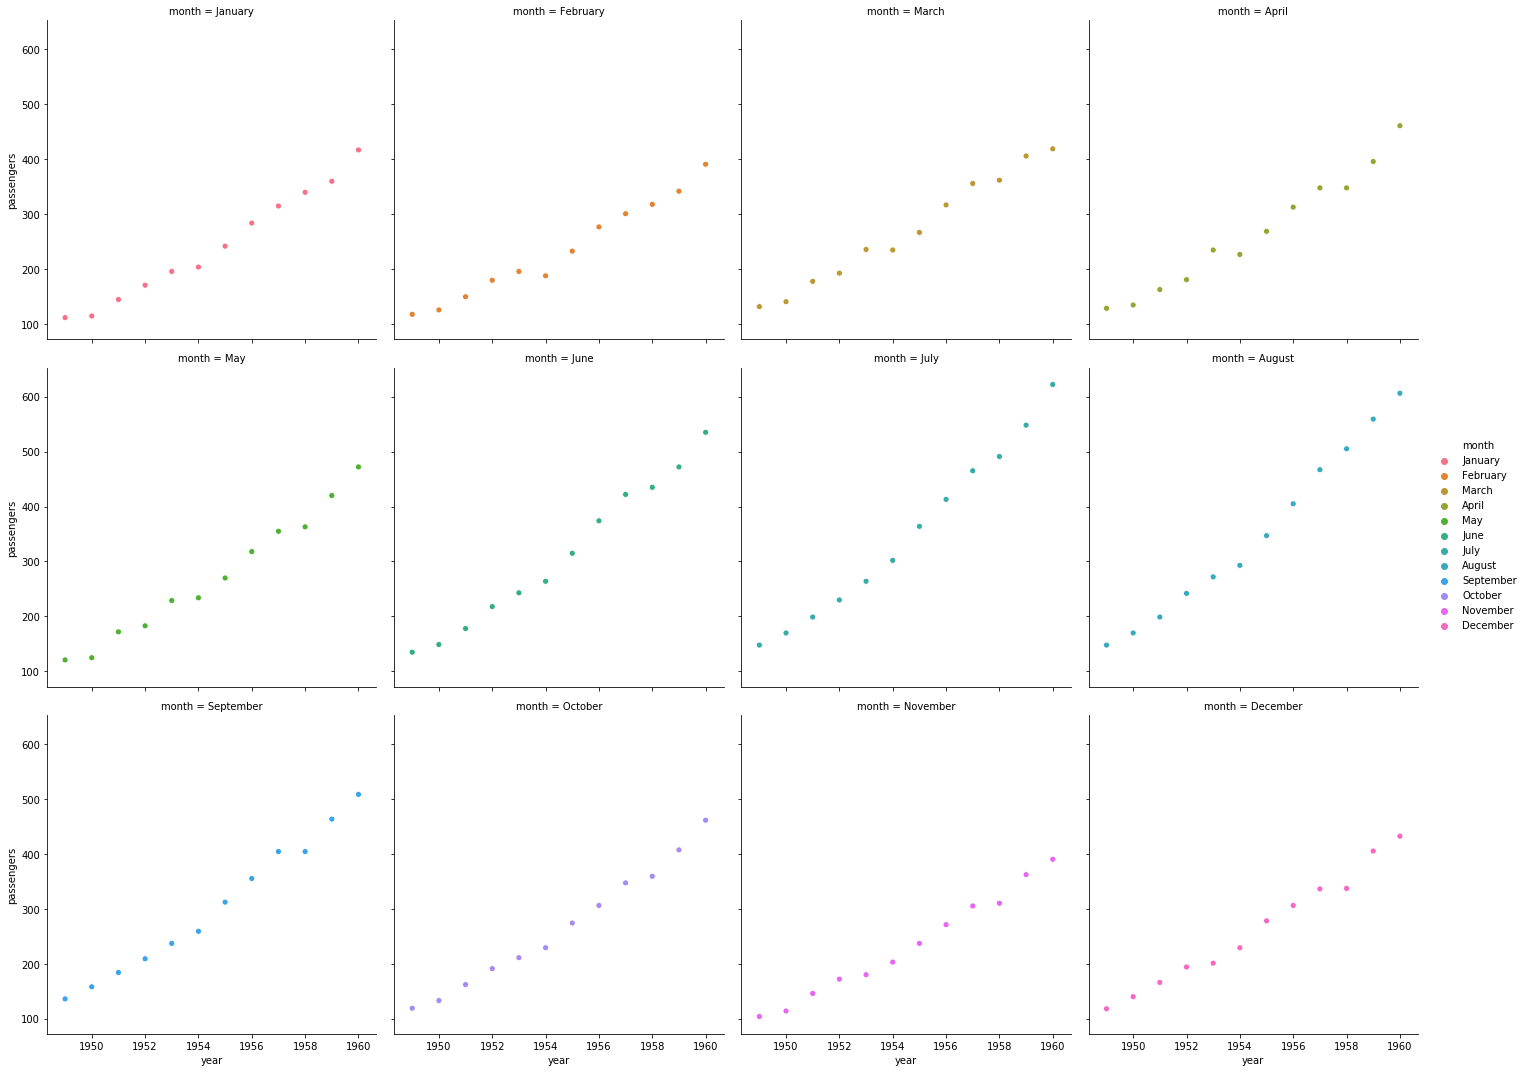

In [206]:
# sns.relplot(x="x", y="y", col='dataset', data=df);

sns.relplot(x="year", y="passengers", col='month', hue='month', col_wrap=4, data=flights)

### Plot month & passengers

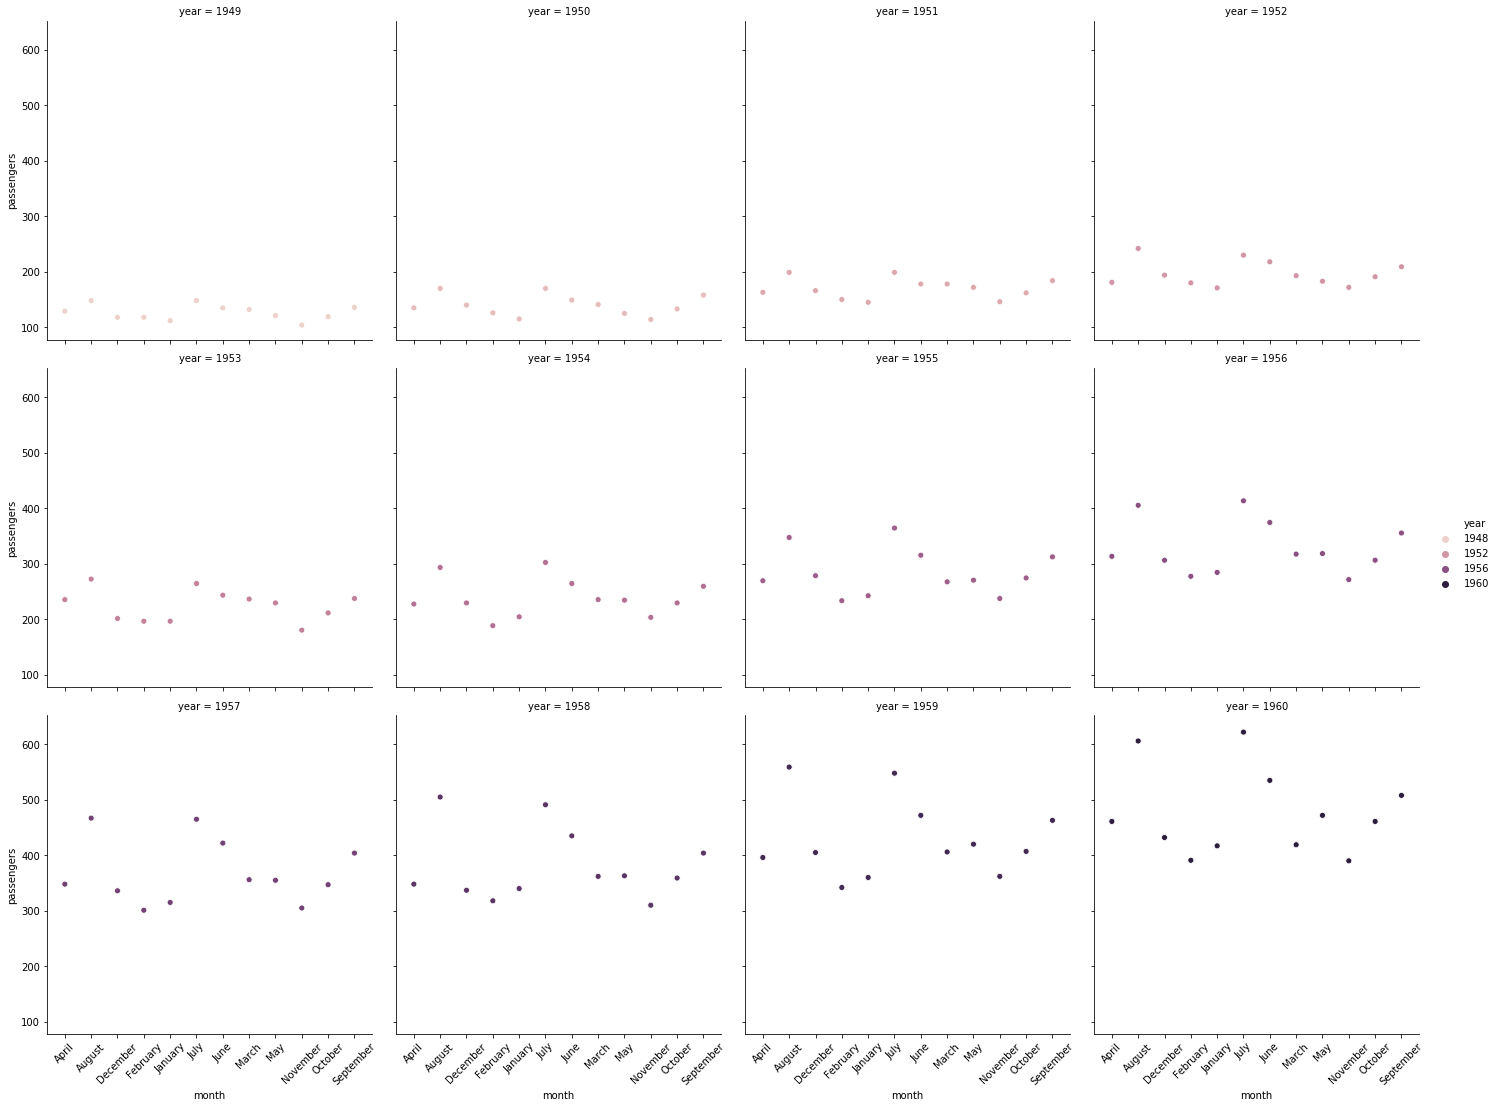

In [207]:
sns.relplot(x="month", y="passengers", col='year', col_wrap=4, hue='year', data=flights).set_xticklabels(rotation=45)

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [210]:
'''
table = pivot_table(df, values='D', index=['A', 'B'],
  columns=['C'], aggfunc=np.sum)
'''
# pd.pivot_table(df, index=['regiment','company'], aggfunc='mean')

flights_pivot = pd.pivot_table(flights, index=['month', 'year'])  # aggfunc='mean'
flights_pivot

passengers
month    year            
January  1949         112
         1950         115
         1951         145
         1952         171
         1953         196
         1954         204
         1955         242
         1956         284
         1957         315
         1958         340
         1959         360
         1960         417
February 1949         118
         1950         126
         1951         150
         1952         180
         1953         196
         1954         188
         1955         233
         1956         277
         1957         301
         1958         318
         1959         342
         1960         391
March    1949         132
         1950         141
         1951         178
         1952         193
         1953         236
         1954         235
...                   ...
October  1955         274
         1956         306
         1957         347
         1958         359
         1959         407
         1960         461
November 1949         104
         1950         114
         1951         146
         1952         172
         1953         180
         1954         203
         1955         237
         1956         271
         1957         305
         1958         310
         1959         362
         1960         390
December 1949         118
         1950         140
         1951         166
         1952         194
         1953         201
         1954         229
         1955         278
         1956         306
         1957         336
         1958         337
         1959         405
         1960         432

[144 rows x 1 columns]

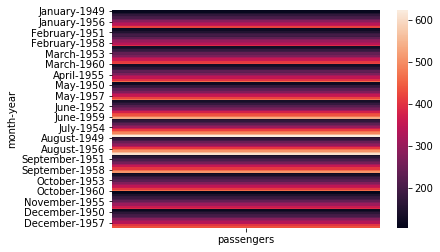

In [214]:
ax2 = sns.heatmap(flights_pivot)

### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [209]:
flights_pivot2 = flights.pivot("month", "year", "passengers")
flights_pivot2.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


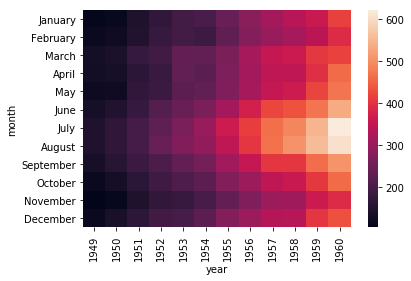

In [213]:
ax = sns.heatmap(flights_pivot2)

# Objective Challenge

### For this challenge I will be plotting with seaborn using the Bostong Housing Dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [20]:
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
housing.shape

(20640, 10)

In [22]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [30]:
housing['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [0]:
# df.rename({1: 2, 2: 4}, axis='index')

housing.rename({'median_house_value': 'house_price'}, axis='columns', inplace=True)

In [28]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_price,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [0]:
housing_truncated = housing.loc[:1000,:]

In [33]:
housing_truncated.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_price,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
housing_truncated.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_price,ocean_proximity
346,-122.17,37.76,33.0,1280.0,307.0,999.0,286.0,2.5625,89300.0,NEAR BAY
737,-122.13,37.67,38.0,2012.0,347.0,880.0,332.0,3.1734,181600.0,NEAR BAY
391,-122.30,37.90,15.0,5083.0,1212.0,2420.0,1146.0,4.5824,256100.0,NEAR BAY
412,-122.28,37.89,52.0,2315.0,408.0,835.0,369.0,4.5893,290100.0,NEAR BAY
240,-122.21,37.78,46.0,2239.0,508.0,1390.0,569.0,2.7352,137300.0,NEAR BAY


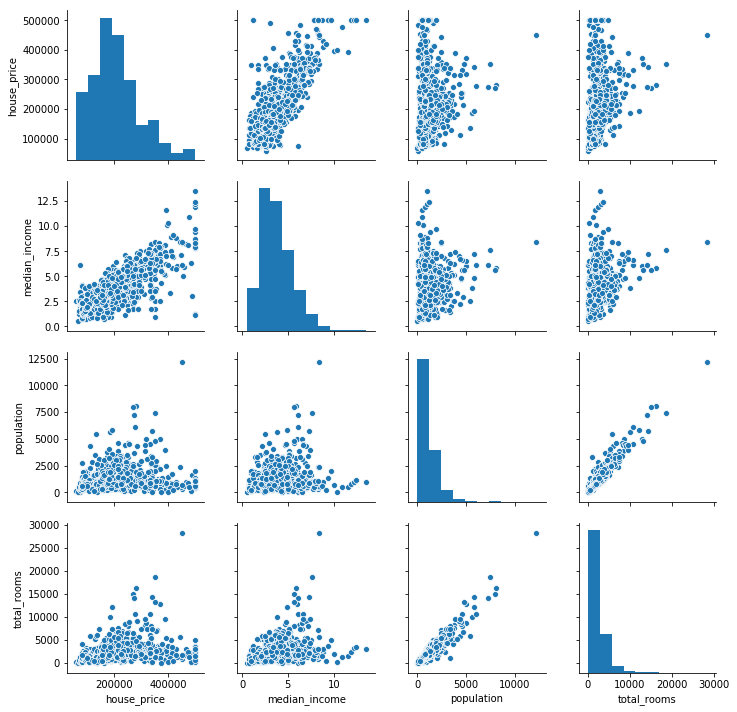

In [41]:
# sns.pairplot(iris, vars=["sepal_width", "sepal_length"])

sns.pairplot(housing_truncated, vars=['house_price', 'median_income', 'population', 'total_rooms'])

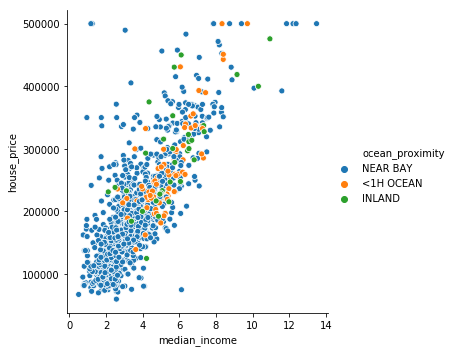

In [42]:
# sns.relplot(x="total_bill", y="tip", hue="day", data=tips)

sns.relplot(x="median_income", y="house_price", hue="ocean_proximity", data=housing_truncated)

In [0]:
sns.set(style="ticks", color_codes=True)


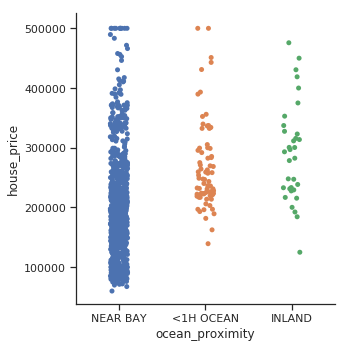

In [44]:
# sns.catplot(x="day", y="total_bill", data=tips);

sns.catplot(x="ocean_proximity", y="house_price", data=housing_truncated);